In [4]:
from pennylane import numpy as np
from vqls import *
from hyperparameters import *

In [7]:
c = np.array([1, 0.2, 0.2])
A_terms = ["III", "XII", "XZI"]

A_mat = A_to_num(n_qubits, c, A_terms)
print(np.linalg.norm(A_mat, ord = 2))
print(np.sort(np.linalg.eigvals(A_mat)))

A_norm = np.linalg.norm(A_mat, ord = 2)
c = np.array(c)
c /= A_norm

norm_A_mat = A_to_num(n_qubits, c, A_terms)
print(np.linalg.norm(norm_A_mat))

1.4
[0.59999996+0.j 0.59999996+0.j 1.        +0.j 1.        +0.j
 1.        +0.j 1.        +0.j 1.39999998+0.j 1.39999998+0.j]
2.0995626


In [8]:
b = np.ones(8) / np.sqrt(8) # TEMPORARY

A_inv = np.linalg.inv(A_mat)
x = np.dot(A_inv, b)

c_probs = (x / np.linalg.norm(x)) ** 2

/Users/bigsad/Downloads/Algorithm-Research/Student-Hub/Indy-Ng/.venv/lib/python3.11/site-packages/matplotlib/transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


NameError: name 'q_probs' is not defined

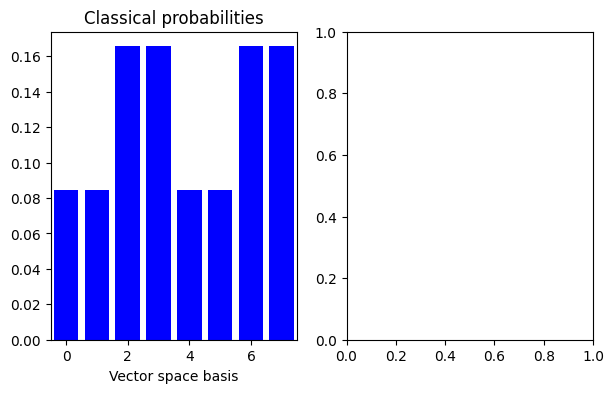

In [10]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 4))

ax1.bar(np.arange(0, 2 ** n_qubits), c_probs, color="blue")
ax1.set_xlim(-0.5, 2 ** n_qubits - 0.5)
ax1.set_xlabel("Vector space basis")
ax1.set_title("Classical probabilities")

ax2.bar(np.arange(0, 2 ** n_qubits), q_probs, color="green")
ax2.set_xlim(-0.5, 2 ** n_qubits - 0.5)
ax2.set_xlabel("Hilbert space basis")
ax2.set_title("Quantum probabilities")

plt.show()